## **Protein Data Bank (PDB) Dataset: A Detailed Explanation**

The **Protein Data Bank (PDB)** is a **repository of 3D structural data** for biological macromolecules such as **proteins, DNA, RNA, and small molecules**. These structures are obtained through experimental techniques like **X-ray crystallography, NMR spectroscopy, and cryo-electron microscopy (cryo-EM)**.

A **PDB file** is a structured text file that stores the atomic coordinates and other metadata of a molecule. It contains different **record types**, each serving a specific purpose.

---

# **📌 Key Components of a PDB Dataset**
A **PDB file** consists of multiple **record types**, which are structured lines of text that define different aspects of a biomolecule.

---

## **1️⃣ HEADER Section**
- **Purpose:** Provides basic information about the molecule.
- **Example:**
  ```
  HEADER    OXYGEN TRANSPORT                      01-JAN-2000   1MBN
  ```
  - `"OXYGEN TRANSPORT"` → Function of the protein.
  - `"01-JAN-2000"` → Date of deposition in the PDB.
  - `"1MBN"` → PDB identifier (unique 4-character code).

---

## **2️⃣ TITLE Section**
- **Purpose:** Gives a descriptive title of the structure.
- **Example:**
  ```
  TITLE     MYOGLOBIN STRUCTURE DETERMINED AT 2.0 Å RESOLUTION
  ```

---

## **3️⃣ REMARK Section**
- **Purpose:** Contains metadata and comments about the structure.
- **Types:**
  - `REMARK 200`: Resolution of the structure.
  - `REMARK 350`: Biological assembly information.
  - `REMARK 465`: Lists missing residues in the structure.
- **Example:**
  ```
  REMARK   200  RESOLUTION. 2.0 ANGSTROMS.
  ```

---

## **4️⃣ SEQRES Section**
- **Purpose:** Lists the full primary sequence of the protein.
- **Example:**
  ```
  SEQRES   1 A  153  GLY VAL ALA LEU LYS ILE MET ASN PRO GLU
  ```

---

## **5️⃣ HELIX & SHEET Sections**
- **Purpose:** Describe secondary structures like **α-helices** and **β-sheets**.
- **Example:**
  ```
  HELIX    1   1 ALA A    10  THR A    20  1                                  11
  SHEET    1   A 2  VAL A    1  GLY A    5  0
  ```

---

## **6️⃣ ATOM & HETATM Sections (Atomic Coordinates)**
This section **defines the position of each atom in 3D space**.

### **🔹 ATOM (Protein and Nucleic Acid Atoms)**
- **Purpose:** Stores atomic details of **standard residues** (amino acids in proteins or nucleotides in DNA/RNA).
- **Example:**
  ```
  ATOM      1  N   GLY A   1      11.104  10.235   5.679  1.00 30.00           N  
  ```
  - `ATOM` → Standard residue.
  - `1` → Atom serial number.
  - `N` → Atom name (Nitrogen).
  - `GLY` → Residue name (Glycine).
  - `A` → Chain ID.
  - `1` → Residue sequence number.
  - `11.104  10.235   5.679` → **x, y, z coordinates**.
  - `1.00` → Occupancy (probability of atom's presence).
  - `30.00` → B-factor (thermal motion).

### **🔹 HETATM (Non-standard Residues)**
- **Purpose:** Represents atoms of **ligands, ions, water molecules, or modified residues**.
- **Example:**
  ```
  HETATM 1234  O   HOH A  101     15.678  22.334   7.891  1.00 20.00           O  
  ```
  - `HETATM` → Non-standard molecule.
  - `HOH` → Water molecule.
  - `101` → Residue number.

---

## **7️⃣ CONECT Section**
- **Purpose:** Defines **bonds** between atoms (important for ligands).
- **Example:**
  ```
  CONECT  1234  1235  1236
  ```
  - Specifies bonding between atom `1234` and atoms `1235` and `1236`.

---

## **8️⃣ ANISOU Section (Anisotropic Temperature Factor)**
- **Purpose:** Provides detailed atomic displacement parameters for **better resolution**.
- **Example:**
  ```
  ANISOU  123  C   ASP A  10     4225   3106   3882    110   -203   -155       C
  ```
  - `ANISOU` → Anisotropic B-factor.
  - `4225  3106  3882 ...` → Defines atomic displacement.

---

## **9️⃣ MODEL & ENDMDL Sections (For NMR Structures)**
- **Purpose:** Stores **multiple conformations** for **NMR** or **ensemble modeling**.
- **Example:**
  ```
  MODEL        1
  ATOM      1  N   GLY A   1      11.104  10.235   5.679  1.00 30.00           N
  ENDMDL
  MODEL        2
  ATOM      1  N   GLY A   1      11.204  10.335   5.779  1.00 31.00           N
  ENDMDL
  ```

---

## **🔟 END Section**
- **Purpose:** Marks the **end of a PDB file**.
- **Example:**
  ```
  END
  ```

---

# **📊 Summary Table of PDB Components**
| Section   | Purpose |
|-----------|---------|
| **HEADER**  | General info about the structure. |
| **TITLE**   | Descriptive title of the structure. |
| **REMARK**  | Metadata, resolution, missing residues. |
| **SEQRES**  | Full primary sequence of the biomolecule. |
| **HELIX & SHEET** | Defines secondary structures (α-helices, β-sheets). |
| **ATOM**   | 3D atomic coordinates for **standard residues**. |
| **HETATM** | 3D atomic coordinates for **non-standard residues** (ligands, ions). |
| **ANISOU** | Detailed atomic displacement (anisotropic B-factor). |
| **CONECT** | Describes bonds between atoms. |
| **MODEL & ENDMDL** | Stores **multiple conformations** (for NMR structures). |
| **END**    | Marks the end of the PDB file. |

---

# **🧑‍🔬 How Is PDB Data Used?**
The **PDB dataset** is used in:
- **Protein structure prediction** (e.g., AlphaFold).
- **Drug discovery** (analyzing ligand binding sites).
- **Molecular dynamics simulations**.
- **Structure-based machine learning**.
- **Bioinformatics and evolutionary studies**.

---

# **📌 Conclusion**
A **PDB file** is a structured dataset storing **3D coordinates, sequence, secondary structure, atomic motion, and connectivity**. It plays a crucial role in **structural biology and bioinformatics**.


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import os
import numpy as np
from biopandas.pdb import PandasPdb
import requests

In [3]:
DATA_DIR = "data"
PDB_IDS = ["1crn", "1alm", "1ubq", "1hhp", "1mbn"]  # Add more IDs as needed
#  This is a list of PDB IDs, which are unique identifiers for protein structures stored in the Protein Data Bank (PDB).
# "1crn" → Crambin
# "1alm" → Almadenin
# "1ubq" → Ubiquitin
# "1hhp" → Hemoglobin
# "1mbn" → Myoglobin

RAW_DIR = os.path.join(DATA_DIR, "raw")
pdb_path = os.path.join(RAW_DIR, f"{PDB_IDS[1]}.pdb")


ppdb = PandasPdb().read_pdb(pdb_path)
feilds = ['ATOM','HETATM','ANISOU','OTHERS']

print(ppdb.df[feilds[0]].columns)
# print(ppdb.df[feilds[1]].columns)
# print(ppdb.df[feilds[2]].columns)
# print(ppdb.df[feilds[3]].columns)
# ATOM
# HETATM
# ANISOU
# OTHERS

Index(['record_name', 'atom_number', 'blank_1', 'atom_name', 'alt_loc',
       'residue_name', 'blank_2', 'chain_id', 'residue_number', 'insertion',
       'blank_3', 'x_coord', 'y_coord', 'z_coord', 'occupancy', 'b_factor',
       'blank_4', 'segment_id', 'element_symbol', 'charge', 'line_idx'],
      dtype='object')


These terms refer to **different types of records** in a **PDB (Protein Data Bank) file**. Each line in a PDB file starts with a **record type** that indicates the type of information it contains.

---

## **1. ATOM**
- **Meaning:** Describes **standard atoms** in amino acids or nucleotides.
- **Usage:** Contains atomic coordinates for protein or nucleic acid residues.
- **Example in PDB file:**
  ```
  ATOM      1  N   MET A   1      11.104  10.235   5.679  1.00 30.00           N  
  ```
  - `ATOM` → Standard protein/nucleic acid atom.
  - `1` → Atom serial number.
  - `N` → Atom name (Nitrogen).
  - `MET` → Residue (Methionine).
  - `A` → Chain identifier.
  - `1` → Residue sequence number.
  - `11.104  10.235   5.679` → (x, y, z) coordinates.

**Key Takeaway:**  
All **biologically relevant atoms in proteins or DNA/RNA** are listed under `ATOM`.

---

## **2. HETATM (Heteroatom)**
- **Meaning:** Describes **non-standard residues**, such as:
  - Ligands (small molecules binding to a protein).
  - Ions (e.g., `Na+`, `Ca2+`).
  - Water molecules (`HOH`).
  - Modified amino acids or nucleotides.
- **Example in PDB file:**
  ```
  HETATM 1234  O   HOH A  101     15.678  22.334   7.891  1.00 20.00           O  
  ```
  - `HETATM` → Non-standard residue.
  - `HOH` → Water molecule.
  - `101` → Residue sequence number.

**Key Takeaway:**  
If a structure contains **ligands, metal ions, or water molecules**, they will be in `HETATM` records.

---

## **3. ANISOU (Anisotropic B-factor)**
- **Meaning:** Describes **atomic displacement** in **six directions** instead of one (unlike `B-factor` in `ATOM`).
- **Usage:** Helps in analyzing **thermal vibrations** and **crystallographic anisotropy**.
- **Example in PDB file:**
  ```
  ANISOU  123  C   ASP A  10     4225   3106   3882    110   -203   -155       C
  ```
  - `ANISOU` → Anisotropic temperature factor.
  - `4225  3106  3882 ...` → Six parameters describing thermal movement.

**Key Takeaway:**  
Used in **high-resolution crystal structures** to capture **detailed atomic vibrations**.

---

## **4. OTHERS (Miscellaneous Records)**
Other types of records in a **PDB file** include:

| Record Type  | Description |
|-------------|------------|
| **HEADER**  | General title of the PDB file. |
| **TITLE**   | Describes the structure. |
| **REMARK**  | Contains additional notes or metadata. |
| **SEQRES**  | Full primary sequence of the protein. |
| **HELIX**   | Defines α-helices. |
| **SHEET**   | Defines β-sheets. |
| **CONECT**  | Describes bonds between atoms (e.g., disulfide bridges). |
| **MODEL**   | Marks different conformations in **NMR structures**. |
| **END**     | Marks the end of the PDB file. |

---

### **Summary Table**
| Record Type | Description |
|------------|-------------|
| **ATOM**   | Standard atoms in amino acids or nucleotides. |
| **HETATM** | Non-standard residues (ligands, ions, water). |
| **ANISOU** | Anisotropic B-factor (detailed atomic displacement). |
| **OTHERS** | Various metadata and structure information. |



Index(['record_name', 'atom_number', 'blank_1', 'atom_name', 'alt_loc',
       'residue_name', 'blank_2', 'chain_id', 'residue_number', 'insertion',
       'blank_3', 'x_coord', 'y_coord', 'z_coord', 'occupancy', 'b_factor',
       'blank_4', 'segment_id', 'element_symbol', 'charge', 'line_idx'],
      dtype='object')


### Define the Problem 
The protein backbone is the foundational scaffold of a protein’s 3D structure, consisting of a repeating sequence of atoms: the nitrogen (N) from the amino group, the alpha carbon (Cα) to which the side chain is attached, and the carbonyl carbon (C) from the carboxyl group. These atoms are linked by peptide bonds (between the C of one amino acid and the N of the next), forming a chain that defines the protein’s fold.

Your goal when using diffusion models is to **generate the 3D spatial coordinates** of these backbone atoms. This could serve two purposes:
1. **Sequence-Specific Prediction:** Given an amino acid sequence (e.g., "ALGKV..."), predict a realistic backbone conformation that matches the chemical and physical properties of that sequence.
2. **De Novo Design:** Generate plausible backbone structures without a predefined sequence, exploring novel protein folds for synthetic biology or drug design.

The problem is challenging because:
- Protein backbones aren’t random; they fold into specific shapes (e.g., alpha helices, beta sheets) driven by hydrogen bonding, hydrophobic interactions, and side-chain effects.
- You need coordinates that respect biochemical constraints: peptide bond lengths (~1.33Å), bond angles (~110–120°), and torsion angles (φ, ψ) that fall within energetically favorable regions (visualized in Ramachandran plots).
- For diffusion models, the task is generative: starting from noise, you’re reconstructing a structure that could exist in nature.

In practice, you might define success as generating coordinates that:
- Are physically realistic (no impossible bond lengths or clashes).
- Match known protein folding patterns if sequence-conditioned.
- Could be refined into a full protein (with side chains) using tools like Rosetta or molecular dynamics.

---

### Data Representation 
To apply diffusion models, you need to represent the protein backbone in a way that’s compatible with the noise-adding and denoising process. Here are the key options, with more detail:

#### 1. 3D Coordinates
- **What It Is:** For each atom (N, Cα, C) in the backbone, store its position as an (x, y, z) tuple in 3D space. For a protein with N residues, you’d have 3N atoms (N, Cα, C per residue), so the data is a tensor of shape [3N, 3].
- **Why It Works for Diffusion:** Diffusion models natively handle continuous data like coordinates. The forward process adds Gaussian noise to these positions (e.g., x → x + ε, where ε ~ N(0, σ)), and the model learns to reverse this.
- **Pros:**
  - Intuitive and directly usable for visualization or downstream tasks (e.g., adding side chains).
  - Captures the full spatial structure, including long-range interactions.
- **Cons:**
  - Redundant information: coordinates are constrained by bond lengths and angles, so not all positions are equally probable.
  - Sensitive to rotations/translations (you might need equivariant models to handle this).

#### 2. Distances and Angles
- **What It Is:** Instead of raw coordinates, represent the backbone using internal coordinates:
  - **Bond lengths:** Distances between consecutive atoms (e.g., N-Cα, Cα-C), which are nearly fixed (e.g., ~1.47Å, ~1.53Å).
  - **Bond angles:** Angles between triplets of atoms (e.g., N-Cα-C, ~110°).
  - **Torsion angles:** The dihedral angles φ (C-N-Cα-C), ψ (N-Cα-C-N), and ω (Cα-C-N-Cα), where ω is usually ~180° (trans) due to the planar peptide bond.
- **Why It Works for Diffusion:** You can add noise to these angles or distances, and the model learns to denoise them into realistic values. Coordinates can then be reconstructed from these using geometric transformations.
- **Pros:**
  - Reduces dimensionality and enforces some physical constraints (e.g., fixed bond lengths).
  - Torsion angles (φ, ψ) are key to protein folding and align with Ramachandran distributions.
- **Cons:**
  - Reconstructing 3D coordinates from angles requires additional computation (e.g., using the NeRF algorithm or chain kinematics).
  - Harder to capture global structure directly.

#### 3. Simplified Cα Representation
- **What It Is:** Represent only the Cα atom positions for each residue (one per amino acid). For N residues, you’d have a tensor of shape [N, 3].
- **Why It Works for Diffusion:** Cα atoms trace the backbone’s overall path, and their positions imply the rest of the backbone (N and C can be inferred with peptide bond constraints). Noise is added to Cα coordinates, and the model denoises them.
- **Pros:**
  - Simplifies the problem: fewer atoms to generate (N vs. 3N).
  - Cα-Cα distances (~3.8Å in extended chains) provide a good proxy for backbone shape.
  - Common in protein design tools (e.g., AlphaFold often focuses on Cα initially).
- **Cons:**
  - Loses fine details (e.g., peptide bond orientation).
  - Assumes N and C positions can be added later, which might introduce errors.

Combining **3D coordinates** and **distances/angles** into a hybrid representation for protein backbone generation with diffusion models is a brilliant idea! It leverages the strengths of both: the spatial intuitiveness of coordinates and the physical constraints encoded in distances and angles. Here’s how you might design this combined representation, why it’s useful, and how it fits into a diffusion framework:

---

### Combined Representation: 3D Coordinates + Distances and Angles

#### What It Looks Like
For each residue in the protein backbone (N, Cα, C atoms), you’d represent the structure with:
1. **3D Coordinates:**
   - A tensor of shape `[3N, 3]` for N residues, where each row is the (x, y, z) position of an atom (N, Cα, C in sequence).
   - Example for one residue: `N: [1.0, 2.0, 3.0], Cα: [1.5, 2.5, 4.0], C: [2.0, 3.0, 5.0]`.

2. **Distances and Angles (Internal Coordinates):**
   - **Bond lengths:** Distances between consecutive atoms (e.g., N-Cα, Cα-C, C-N_next).
   - **Bond angles:** Angles between triplets (e.g., ∠N-Cα-C).
   - **Torsion angles:** Dihedrals φ (C-N-Cα-C), ψ (N-Cα-C-N_next), ω (Cα-C-N-Cα_next).
   - Example: `[d_N-Cα = 1.47Å, d_Cα-C = 1.53Å, ∠N-Cα-C = 110°, φ = -60°, ψ = -40°, ω = 180°]`.

The combined representation could be a tuple or concatenated tensor:
- Coordinates: `[3N, 3]` for positions.
- Internal features: `[M, K]` where M depends on the number of distances/angles calculated (e.g., 3N-1 distances, fewer angles/torsions), and K is the feature dimension (e.g., 1 for distances, 3 for angles if vectorized).

#### Why Combine Them?
- **Coordinates:** Capture the global 3D structure and are directly usable in diffusion’s noise-adding process.
- **Distances/Angles:** Enforce local geometric constraints (e.g., peptide bond planarity, realistic torsions) and reduce physically implausible outputs.
- Together, they provide a richer signal: coordinates give the "where," while distances/angles ensure the "how" of atomic connectivity.

---

### How It Fits into Diffusion Models

#### 1. Forward Process (Noising)
- **Coordinates:** Add Gaussian noise to the (x, y, z) positions at each timestep t:  
  `x_t = sqrt(1 - β_t) * x_{t-1} + sqrt(β_t) * ε`, where ε ~ N(0, I) and β_t is the noise schedule.
- **Distances/Angles:** You have two options:
  - **Option A: Compute on-the-fly:** Don’t noise them directly; recompute them from noised coordinates at each step. They act as a derived signal, not a noised input.
  - **Option B: Noise them too:** Treat distances/angles as part of the data and add noise (e.g., small perturbations to angles within realistic bounds). This is trickier due to their constrained ranges (e.g., ω ≈ 180°).

- **Practical Choice:** Start with Option A—noise only coordinates, compute distances/angles as a conditioning signal. This keeps the diffusion process simple and leverages internal coordinates as a guide.

#### 2. Reverse Process (Denoising)
- **Model Input:** At each timestep t, the neural network sees:
  - Noisy coordinates `x_t` (e.g., `[3N, 3]` tensor).
  - Computed distances/angles from `x_t` (e.g., a feature vector per residue).
  - Optional: Amino acid sequence info (if conditioned).
- **Model Output:** Predict the noise `ε` to subtract from `x_t`, or directly predict cleaner coordinates `x_{t-1}`.
- **Architecture:** Use a graph neural network (GNN) or transformer:
  - Nodes: Atoms with their noisy coordinates.
  - Edges: Bond relationships with distances/angles as edge features.
  - This respects the backbone’s topology while learning from both representations.

#### 3. Loss Function
- Standard diffusion loss: Minimize the difference between predicted and actual noise added to coordinates.
- Add a **consistency loss**:
  - Compute distances/angles from predicted coordinates.
  - Penalize deviations from physically realistic values (e.g., N-Cα distance straying from 1.47Å, or φ, ψ outside Ramachandran regions).
- Example: `L = L_diffusion + λ * L_constraints`, where `L_constraints` measures geometric errors.

#### 4. Sampling
- Start with random noise for coordinates (`x_T ~ N(0, I)`).
- At each denoising step:
  - Predict the next coordinates using the model, informed by distances/angles.
  - Optionally, project the output to satisfy constraints (e.g., adjust coordinates to fix bond lengths).
- Result: A backbone with plausible global structure (from coordinates) and local geometry (from distances/angles).

---

### Implementation Tips
1. **Data Prep:**
   - Extract coordinates from PDB files (e.g., using BioPython).
   - Precompute distances/angles with libraries like MDTraj or custom geometry functions.

2. **Model Design:**
   - Use an equivariant GNN (e.g., EGNN) to handle 3D coordinates while respecting rotations/translations.
   - Encode distances/angles as edge or node features (e.g., sine/cosine embeddings for angles).

3. **Example Workflow:**
   - Input: Noisy coords `[3N, 3]`, compute distances `[3N-1]`, angles `[3N-2]`, torsions `[N]`.
   - GNN processes this, outputs denoised coords.
   - Post-process: Adjust coords to exactly match ideal bond lengths if needed.

4. **Validation:**
   - Check bond lengths (~1.33Å for C-N peptide bonds).
   - Verify torsion angles against Ramachandran plots.
   - Visualize with PyMOL or similar to ensure no clashes.

---

### Benefits of the Hybrid Approach
- **Robustness:** Coordinates guide the global fold; distances/angles prevent local distortions.
- **Flexibility:** Works for both sequence-conditioned and de novo generation.
- **Interpretability:** Internal coordinates let you debug physical realism.

### Challenges
- **Complexity:** Computing distances/angles at each step adds overhead.
- **Balancing Representations:** The model might over-rely on one (e.g., coordinates) if not properly weighted.
- **Noise Alignment:** Noising angles directly is tricky due to their periodic nature (e.g., 360° = 0°).

---

In [2]:
# Directories
PROCESSED_DIR = "data/processed"

# Load all processed PDB files
def load_data():
    pdb_data = {}
    for file in os.listdir(PROCESSED_DIR):
        if file.endswith(".npy"):
            pdb_id = file.split(".")[0]
            pdb_data[pdb_id] = np.load(os.path.join(PROCESSED_DIR, file))
    return pdb_data

data = load_data()

In [3]:
print(data)

{'1alm': array([[ 98.086, -29.944,  22.466],
       [ 99.538, -31.783,  19.539],
       [ 96.376, -31.009,  17.625],
       ...,
       [  3.223, -23.157, -36.275],
       [  0.343, -20.921, -35.344],
       [  2.022, -20.26 , -31.91 ]]), '1mbn': array([[-3.6, 16.4, 15.3],
       [-0.9, 14.1, 16.7],
       [-1.1, 12.2, 20. ],
       [ 0. , 12.9, 23.6],
       [ 2.2,  9.8, 23.3],
       [ 3.5, 10.7, 19.8],
       [ 4.5, 14.2, 20.8],
       [ 6.3, 12.3, 23.6],
       [ 8.4, 10.4, 21.1],
       [ 8.8, 13.3, 18.7],
       [10.2, 15.4, 21.6],
       [12.8, 13.1, 23.2],
       [14.5, 12.6, 19.8],
       [14.6, 16.4, 19.6],
       [16.3, 16.8, 22.9],
       [18.9, 14.4, 21.5],
       [19.3, 16.3, 18.2],
       [19.8, 19.3, 20.5],
       [23. , 17.7, 21.7],
       [24.8, 18.6, 18.5],
       [22.7, 21. , 16.4],
       [25.3, 22.2, 13.9],
       [26.4, 18.6, 13.3],
       [22.8, 17.6, 12.4],
       [22.1, 20.7, 10.3],
       [25.3, 20.1,  8.4],
       [24. , 16.6,  8.1],
       [20.5, 17.3,  6.9

In [4]:
# Display basic information
def print_data_info(pdb_data):
    for pdb_id, coords in pdb_data.items():
        print(f"\nPDB ID: {pdb_id}")
        print(f"Number of Cα atoms: {coords.shape[0]}")
        print(f"Shape of data: {coords.shape}")
        print(f"Mean coordinate: {np.mean(coords, axis=0)}")
        print(f"Standard deviation: {np.std(coords, axis=0)}")
print_data_info(data)


PDB ID: 1alm
Number of Cα atoms: 2948
Shape of data: (2948, 3)
Mean coordinate: [31.85563161 -7.02454851 15.12327205]
Standard deviation: [46.9418457  20.62173408 36.38987145]

PDB ID: 1mbn
Number of Cα atoms: 153
Shape of data: (153, 3)
Mean coordinate: [13.71568627 20.47581699  8.2503268 ]
Standard deviation: [9.70817402 7.85194723 8.54110495]

PDB ID: 1crn
Number of Cα atoms: 46
Shape of data: (46, 3)
Mean coordinate: [9.56043478 9.95091304 7.10765217]
Standard deviation: [5.85212986 4.57336211 6.20098862]

PDB ID: 1hhp
Number of Cα atoms: 99
Shape of data: (99, 3)
Mean coordinate: [ 44.27286869  44.2070404  -11.56511111]
Standard deviation: [6.58022526 8.28147977 7.78765767]

PDB ID: 1ubq
Number of Cα atoms: 76
Shape of data: (76, 3)
Mean coordinate: [30.44289474 29.00898684 15.51639474]
Standard deviation: [6.44845263 6.72753879 6.72638931]


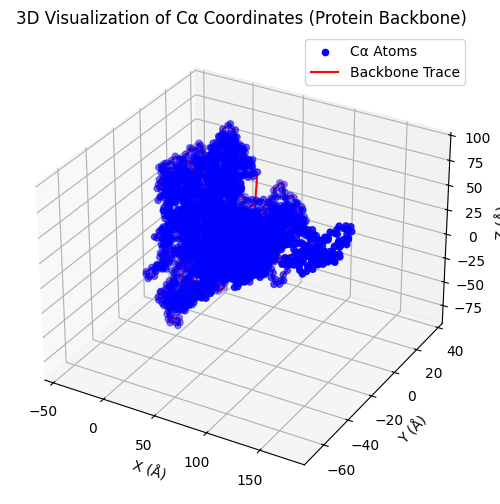

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the processed Cα coordinate data (Example: '1crn.npy')
file_path = "/home/musa/Desktop/0.1. Git Projects/backbone_generation/data/processed/1alm.npy"
try:
    coords = np.load(file_path)

    # Create a 3D scatter plot
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(coords[:, 0], coords[:, 1], coords[:, 2], c='b', marker='o', label="Cα Atoms")
    ax.plot(coords[:, 0], coords[:, 1], coords[:, 2], c='r', linestyle='-', label="Backbone Trace")

    # Labels and title
    ax.set_xlabel("X (Å)")
    ax.set_ylabel("Y (Å)")
    ax.set_zlabel("Z (Å)")
    ax.set_title("3D Visualization of Cα Coordinates (Protein Backbone)")
    ax.legend()

    # Show plot
    plt.show()
except Exception as e:
    print(f"Error loading or plotting data: {e}")


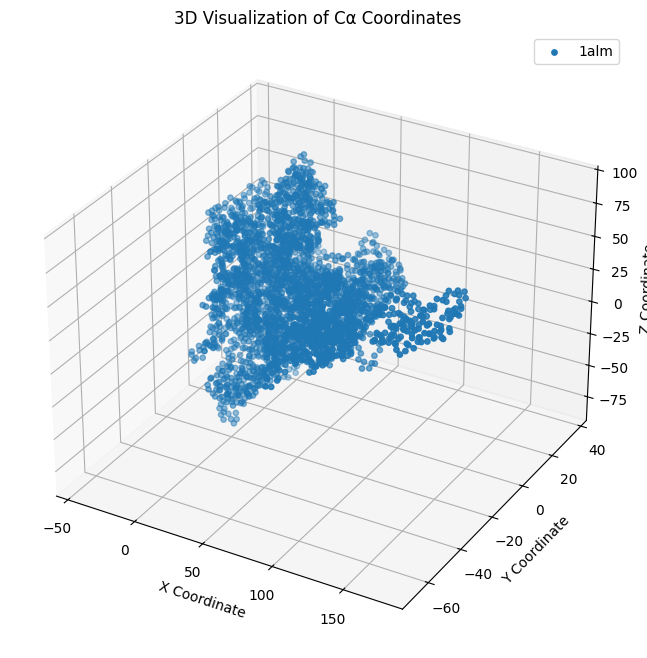

In [ ]:
# 3D Visualization of Cα coordinates
def visualize_3d(pdb_data):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    for pdb_id, coords in pdb_data.items():
        ax.scatter(coords[:, 0], coords[:, 1], coords[:, 2], label=pdb_id, s=15)
        

    ax.set_xlabel("X Coordinate")
    ax.set_ylabel("Y Coordinate")
    ax.set_zlabel("Z Coordinate")
    ax.set_title("3D Visualization of Cα Coordinates")
    ax.legend()
    plt.show()

visualize_3d(data)

In [13]:
# Compute pairwise distances
def compute_pairwise_distances(pdb_data):
    for pdb_id, coords in pdb_data.items():
        distances = np.linalg.norm(coords[:, None, :] - coords[None, :, :], axis=-1)
        mean_distance = np.mean(distances)
        print(f"\nPDB ID: {pdb_id} - Mean Pairwise Distance: {mean_distance:.2f}")

compute_pairwise_distances(data)



PDB ID: 1alm - Mean Pairwise Distance: 79.03

PDB ID: 1mbn - Mean Pairwise Distance: 19.82

PDB ID: 1crn - Mean Pairwise Distance: 12.51

PDB ID: 1hhp - Mean Pairwise Distance: 17.11

PDB ID: 1ubq - Mean Pairwise Distance: 15.02
